# Implementing the Perceptron Neural Network with Python

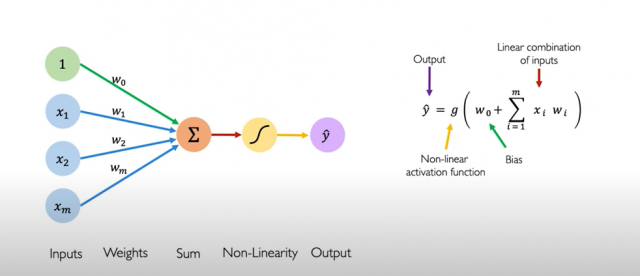
1. Initialize our weight vector w with small random values
2. Until Perceptron converges:

(a) Loop over each feature vector xj and true class label di in our training set D

(b) Take x and pass it through the network, calculating the output value: yj = f(w(t) · xj)

(c) Update the weights w: wi(t +1) = wi(t) +α(dj −yj)xj,i for all features 0 <= i <= n

# Code

In [1]:
'''
Net Input is sum of weighted input signals
'''
def net_input(self, X):
   weighted_sum = np.dot(X, self.coef_[1:]) + self.coef_[0]
   return weighted_sum

In [2]:
'''
Activation function is fed the net input and the unit step function is executed to determine the output.
'''
def activation_function(self, X):
    weighted_sum = self.net_input(X)
    return np.where(weighted_sum >= 0.0, 1, 0)

In [3]:
'''
Prediction is made on the basis of output of activation function
'''
def predict(self, X):
    return self.activation_function(X)

In [4]:
'''
Stochastic Gradient Descent
     
1. Weights are updated based on each training examples.
2. Learning of weights can continue for multiple iterations
3. Learning rate needs to be defined
'''
def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.coef_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    for _ in range(self.n_iterations):
        for xi, expected_value in zip(X, y):
            predicted_value = self.predict(xi)
            self.coef_[1:] = self.coef_[1:] + self.learning_rate * (expected_value - predicted_value) * xi
            self.coef_[0] = self.coef_[0] + self.learning_rate * (expected_value - predicted_value) * 1

In [5]:
import numpy as np
#
# Perceptron implementation
#
class CustomPerceptron(object):
     
    def __init__(self, n_iterations=100, random_state=1, learning_rate=0.01):
        self.n_iterations = n_iterations
        self.random_state = random_state
        self.learning_rate = learning_rate
 
    '''
    Stochastic Gradient Descent
     
    1. Weights are updated based on each training examples.
    2. Learning of weights can continue for multiple iterations
    3. Learning rate needs to be defined
    '''
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.coef_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iterations):
            errors = 0
            for xi, expected_value in zip(X, y):
                predicted_value = self.predict(xi)
                self.coef_[1:] = self.coef_[1:] + self.learning_rate * (expected_value - predicted_value) * xi
                self.coef_[0] = self.coef_[0] + self.learning_rate * (expected_value - predicted_value) * 1
                update = self.learning_rate * (expected_value - predicted_value)
                errors += int(update != 0.0)
            self.errors_.append(errors)
    '''
    Net Input is sum of weighted input signals
    '''
    def net_input(self, X):
            weighted_sum = np.dot(X, self.coef_[1:]) + self.coef_[0]
            return weighted_sum
     
    '''
    Activation function is fed the net input and the unit step function
    is executed to determine the output.
    '''
    def activation_function(self, X):
            weighted_sum = self.net_input(X)
            return np.where(weighted_sum >= 0.0, 1, 0)
     
    '''
    Prediction is made on the basis of output of activation function
    '''
    def predict(self, X):
        return self.activation_function(X)
     
    '''
    Model score is calculated based on comparison of
    expected value and predicted value
    '''
    def score(self, X, y):
        misclassified_data_count = 0
        for xi, target in zip(X, y):
            output = self.predict(xi)
            if(target != output):
                misclassified_data_count += 1
        total_data_count = len(X)
        self.score_ = (total_data_count - misclassified_data_count)/total_data_count
        return self.score_

In [6]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
#
# Load the data set
#
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target
#
# Create training and test split
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
#
# Instantiate CustomPerceptron
#
prcptrn = CustomPerceptron(n_iterations=10)
#
# Fit the model
#
prcptrn.fit(X_train, y_train)
#
# Score the model
#
prcptrn.score(X_test, y_test), prcptrn.score(X_train, y_train)

(0.8888888888888888, 0.9120603015075377)

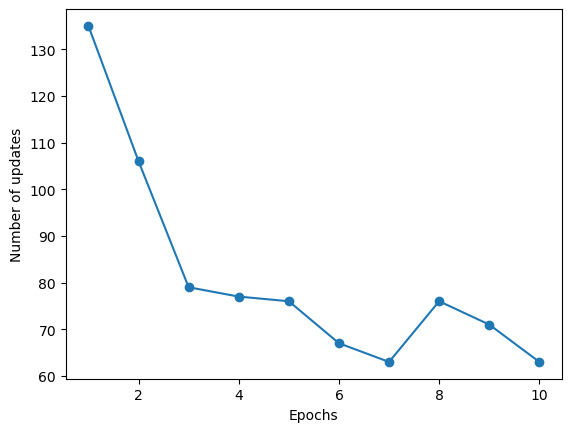

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
 
plt.plot(range(1, len(prcptrn.errors_) + 1), prcptrn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
 
# plt.savefig('images/02_07.png', dpi=300)
plt.show()

In [8]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
 
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)
 
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
 
ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)
 
y_pred = ppn.predict(X_test_std)
 
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
print('Accuracy: %.3f' % ppn.score(X_test_std, y_test))

Accuracy: 0.978
Accuracy: 0.978
